Project 03: ML Model Deployment in Streamlit Platform - CHLA Use Case

In [1]:
import pandas as pd
print(pd.__version__)

2.2.2


In [2]:
import numpy as np
print(np.__version__)

1.26.4


In [3]:
!python --version

Python 3.12.8


In [4]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\ashle\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: autoviz, imbalanced-learn, pandas-dq


In [5]:
!pip install scikit-learn


In [22]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [7]:
import os

print("Current Working Directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current Working Directory: c:\Users\ashle\Downloads\streamlit_handson
Files in directory: ['adult - Copy.csv', 'best_no_show_model.pkl', 'CHLA_clean_data_2024_Appointments.csv', 'CHLA_clean_data_until_2023.csv', 'CHLA_No_Show_Predictor_Ashlee.ipynb', 'encoder.pkl', 'end_user_app_CHLA.py', 'first_income_app.py', 'football_data.csv', 'hello_world.py', 'IncomePredictionAshlee.ipynb', 'IncomePrediction_Working - Copy.ipynb', 'IncomePrediction_Working.py', 'model.pkl', 'NEW_CLEAN_CHLA_clean_data_2024_Appointments.csv', 'NEW_no_show_encoder.pkl', 'no_show_app.py', 'no_show_encoder.pkl', 'no_show_requirements.txt', 'P02-Income Predictor Streamlit-Cloud.pdf', 'Peer', 'requirements - Copy.txt', 'sl_titanic_practice.py', 'Titanic_Data.csv', 'titanic_model_build.ipynb', 'titanic_predictor.sav', 'titanic_pred_app.py']


In [8]:
#Using the past 2023 appointments as my training data
# Load training data (2023)
train_file = "CHLA_clean_data_until_2023.csv"
df_train = pd.read_csv("C:/Users/ashle/Downloads/streamlit_handson/ml-app/CHLA_clean_data_until_2023.csv")

print("Training Data Info:")
print(df_train.info())
print(df_train.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MRN                                       21060 non-null  int64 
 1   APPT_STATUS                               21060 non-null  object
 2   APPT_DATE                                 21060 non-null  object
 3   BOOK_DATE                                 21060 non-null  object
 4   ZIPCODE                                   21060 non-null  object
 5   CLINIC                                    21060 non-null  object
 6   SCHEDULE_ID                               21060 non-null  int64 
 7   APPT_ID                                   21060 non-null  int64 
 8   LEAD_TIME                                 21060 non-null  int64 
 9   IS_REPEAT                                 21060 non-null  object
 10  APPT_TYPE_STANDARDIZE     

In [9]:
#Using the past 2024 appointments as my data foor application predictions
# Load testing data (2024)
file_2024 = "CHLA_clean_data_2024_Appointments.csv"
df_2024 = pd.read_csv("C:/Users/ashle/Downloads/streamlit_handson/ml-app/CHLA_clean_data_2024_Appointments.csv")

print("Data for 2024 Patients:")
print(df_2024.info())
print(df_2024.head())

Data for 2024 Patients:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MRN                                       24 non-null     int64 
 1   APPT_STATUS                               24 non-null     object
 2   APPT_DATE                                 24 non-null     object
 3   BOOK_DATE                                 24 non-null     object
 4   ZIPCODE                                   24 non-null     int64 
 5   CLINIC                                    24 non-null     object
 6   SCHEDULE_ID                               24 non-null     int64 
 7   APPT_ID                                   24 non-null     int64 
 8   LEAD_TIME                                 24 non-null     int64 
 9   IS_REPEAT                                 24 non-null     object
 10  APPT_TYPE_STANDARDIZE       

In [10]:
#Ensuring there are no null values (pre-processing)
print(df_train.isnull().sum())
print(df_2024.isnull().sum())


MRN                                         0
APPT_STATUS                                 0
APPT_DATE                                   0
BOOK_DATE                                   0
ZIPCODE                                     0
CLINIC                                      0
SCHEDULE_ID                                 0
APPT_ID                                     0
LEAD_TIME                                   0
IS_REPEAT                                   0
APPT_TYPE_STANDARDIZE                       0
APPT_NUM                                    0
TOTAL_NUMBER_OF_CANCELLATIONS               0
TOTAL_NUMBER_OF_RESCHEDULED                 0
TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT    0
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT         0
TOTAL_NUMBER_OF_NOSHOW                      0
DAY_OF_WEEK                                 0
WEEK_OF_MONTH                               0
NUM_OF_MONTH                                0
HOUR_OF_DAY                                 0
IS_NOSHOW                         

In [11]:
#I want to take a sneak peak to see what vartiables I need to encode
df_train.head()

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1946298,CONFIRMED,12/26/23 10:30,6/6/23 10:32,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,...,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,4464320,RESCHEDULED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,...,2,0,1,4,12,10,N,3,Others,Other
2,4464320,CONFIRMED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,...,2,0,1,4,12,10,N,3,Others,Other
3,4146637,CONFIRMED,12/21/23 10:30,1/23/23 10:59,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,...,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,4460795,CONFIRMED,12/18/23 9:00,1/9/23 10:59,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,...,3,0,0,3,12,9,N,13,Others,Other


Feature Selection & Feature Engineering

In [13]:
col_names = df_2024.columns
print(col_names)

Index(['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC',
       'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT',
       'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY',
       'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [14]:
#Taking a look at BOOK_DATE and APPT_DATE, I want to make this more relevant by looking at the time in between these (Feature Engineering)...

#I am starting off by making sure they're in the right format
df_train['BOOK_DATE'] = pd.to_datetime(df_train['BOOK_DATE'])
df_train['APPT_DATE'] = pd.to_datetime(df_train['APPT_DATE'])

df_train.head() #Make sure it's correct

#Moving on let's make a relevant "lead time feature"-- I am going to make it in the # days between booking and appointment
df_train['LEAD_TIME'] = np.ceil((df_train['APPT_DATE'] - df_train['BOOK_DATE']).dt.total_seconds() / (24 * 60 * 60)).astype(int)

#Look again
df_train.head()


,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1946298,CONFIRMED,2023-12-26 10:30:00,2023-06-06 10:32:00,91387,VALENCIA CARE CENTER,22576917,77137126,203,Y,...,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,4464320,RESCHEDULED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,21812159,74489619,364,Y,...,2,0,1,4,12,10,N,3,Others,Other
2,4464320,CONFIRMED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,22496669,76863542,364,Y,...,2,0,1,4,12,10,N,3,Others,Other
3,4146637,CONFIRMED,2023-12-21 10:30:00,2023-01-23 10:59:00,91350,VALENCIA CARE CENTER,22466003,76767204,332,Y,...,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,4460795,CONFIRMED,2023-12-18 09:00:00,2023-01-09 10:59:00,91402,VALENCIA CARE CENTER,21862889,74656637,343,Y,...,3,0,0,3,12,9,N,13,Others,Other


In [15]:
df_train[df_train['LEAD_TIME'] < 0]

#I wanted to see if there was any where they are less than 0.. I found there are 2 records, so I am going to drop these

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
14722,4141851,CANCELED,2019-08-28 13:35:00,2019-09-05 10:40:00,90275,SOUTH BAY CARE CENTER,16653278,53107526,-7,Y,...,2,0,2,4,8,13,N,21,Others,Other
14723,4141851,CHECKED IN,2019-08-28 13:35:00,2019-09-11 14:55:00,90275,SOUTH BAY CARE CENTER,16679782,53195566,-14,Y,...,2,0,2,4,8,13,N,21,Others,Other


In [16]:
#Drop these two records
df_train = df_train[df_train['LEAD_TIME'] >= 0]
df_train.head()

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1946298,CONFIRMED,2023-12-26 10:30:00,2023-06-06 10:32:00,91387,VALENCIA CARE CENTER,22576917,77137126,203,Y,...,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,4464320,RESCHEDULED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,21812159,74489619,364,Y,...,2,0,1,4,12,10,N,3,Others,Other
2,4464320,CONFIRMED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,22496669,76863542,364,Y,...,2,0,1,4,12,10,N,3,Others,Other
3,4146637,CONFIRMED,2023-12-21 10:30:00,2023-01-23 10:59:00,91350,VALENCIA CARE CENTER,22466003,76767204,332,Y,...,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,4460795,CONFIRMED,2023-12-18 09:00:00,2023-01-09 10:59:00,91402,VALENCIA CARE CENTER,21862889,74656637,343,Y,...,3,0,0,3,12,9,N,13,Others,Other


In [17]:
#Taking a look at APPT_STATUS to see if this actually has anything relevant for prediction or if will cause data leakage to no-show prediction

df_train['APPT_STATUS'].value_counts()

APPT_STATUS
CHECKED OUT    9813
RESCHEDULED    5062
CANCELED       4128
NOSHOW         1033
CONFIRMED      1009
CHECKED IN       12
HOLD              1
Name: count, dtype: int64

In [18]:
df_train['IS_NOSHOW'].value_counts()

IS_NOSHOW
N    20025
Y     1033
Name: count, dtype: int64

In [19]:
#First looking at feature selection... which features should I drop?
#Drop MRN (not a predictor, just an identifier)
#Drop APPT_ID and SCHEDULE_ID (also identifiers, not useful predictors)
#Drop BOOK_DATE and APPT_DATE after extracting LEAD_TIME
#Drop AAPT_STATUS as it would cause data leakage-- confirming no show rather than predicting

columns_to_drop = ['MRN', 'APPT_ID', 'SCHEDULE_ID', 'BOOK_DATE', 'APPT_DATE', 'APPT_STATUS']

df_train.drop(columns=columns_to_drop, inplace=True)


In [20]:
print(f"Remaining columns after dropping unnecessary features: {df_train.columns.tolist()}")
df_train.head()

Remaining columns after dropping unnecessary features: ['ZIPCODE', 'CLINIC', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']


,ZIPCODE,CLINIC,LEAD_TIME,IS_REPEAT,APPT_TYPE_STANDARDIZE,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,91387,VALENCIA CARE CENTER,203,Y,Follow-up,9,1,2,0,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,91354,VALENCIA CARE CENTER,364,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
2,91354,VALENCIA CARE CENTER,364,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
3,91350,VALENCIA CARE CENTER,332,Y,Follow-up,15,2,8,0,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,91402,VALENCIA CARE CENTER,343,Y,Follow-up,6,1,1,0,3,0,0,3,12,9,N,13,Others,Other


In [43]:
#Now that I have the features I want to keep, I am going to standardize the non-numeric ones.

#from sklearn.preprocessing import LabelEncoder

#category_col =['ZIPCODE', 'CLINIC', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE', 'IS_NOSHOW']

#lbl_data = df_train.copy()
#df_input = df_train[category_col].copy()
#enc = preprocessing.LabelEncoder()
#encoder_dict = dict()
#for cat in category_col:
    #df_input[cat] = df_input[cat].str.lstrip()
    #enc = enc.fit(list(df_input[cat]) + ['Unknown'])
    #encoder_dict[cat] = [cat for cat in enc.classes_]
    #lbl_data[cat] = enc.transform(df_input[cat])

#Commenting out because this only saves the lists

In [23]:
category_col = ['ZIPCODE', 'CLINIC', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']

# Copy dataframe
lbl_data = df_train.copy()
df_input = df_train[category_col].copy()

encoder_dict = {}  # Dictionary to store LabelEncoders

# Encode categorical features
for cat in category_col:
    df_input[cat] = df_input[cat].astype(str).str.strip()  # Ensure consistent formatting
    le = LabelEncoder()
    le.fit(list(df_input[cat]) + ['Unknown'])  # Add 'Unknown' for unseen values
    encoder_dict[cat] = le  # Store encoder
    lbl_data[cat] = le.transform(df_input[cat])  # Transform training data

#Ensure `IS_NOSHOW` is encoded correctly
# Convert "Y" → 1, "N" → 0 before applying Label Encoding
df_train["IS_NOSHOW"] = df_train["IS_NOSHOW"].replace({"N": 0, "Y": 1})

# Apply LabelEncoder to `IS_NOSHOW` to maintain consistency
le_noshow = LabelEncoder()
lbl_data["IS_NOSHOW"] = le_noshow.fit_transform(df_train["IS_NOSHOW"])

# Save all encoders (including IS_NOSHOW separately)
encoder_dict["IS_NOSHOW"] = le_noshow

# Save encoders
with open("NEW_no_show_encoder.pkl", "wb") as file:
    pickle.dump(encoder_dict, file)

print("Encoders saved successfully as 'NEW_no_show_encoder.pkl'!")

Encoders saved successfully as 'NEW_no_show_encoder.pkl'!


In [24]:
lbl_data.head()

,ZIPCODE,CLINIC,LEAD_TIME,IS_REPEAT,APPT_TYPE_STANDARDIZE,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,297,6,203,2,0,9,1,2,0,5,0,1,4,12,10,0,14,1,2
1,280,6,364,2,0,4,0,1,0,2,0,1,4,12,10,0,3,2,5
2,280,6,364,2,0,4,0,1,0,2,0,1,4,12,10,0,3,2,5
3,276,6,332,2,0,15,2,8,0,4,0,3,3,12,10,0,12,1,2
4,300,6,343,2,0,6,1,1,0,3,0,0,3,12,9,0,13,2,5


In [25]:
lbl_data["IS_NOSHOW"].value_counts()

IS_NOSHOW
0    20025
1     1033
Name: count, dtype: int64

In [26]:
print(encoder_dict)

{'ZIPCODE': LabelEncoder(), 'CLINIC': LabelEncoder(), 'IS_REPEAT': LabelEncoder(), 'APPT_TYPE_STANDARDIZE': LabelEncoder(), 'ETHNICITY_STANDARDIZE': LabelEncoder(), 'RACE_STANDARDIZE': LabelEncoder(), 'IS_NOSHOW': LabelEncoder()}


In [27]:
print(encoder_dict.keys())  # Ensure "IS_NOSHOW" exists in the dictionary
print(encoder_dict["IS_NOSHOW"].classes_) 

dict_keys(['ZIPCODE', 'CLINIC', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE', 'IS_NOSHOW'])
[0 1]


In [28]:
X = lbl_data.drop('IS_NOSHOW', axis = 1)
Y = lbl_data['IS_NOSHOW']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

Looking at different models

In [30]:
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_test: [0 1]


In [31]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc, GradientBoostingClassifier as gbc, AdaBoostClassifier as abc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set correct positive label
positive_label = 1  #No-Show is labeled as "1"

# Initialize models
models = {
    "Logistic Regression": lr(),
    "K-Nearest Neighbors": kn(),
    "Decision Tree": dtc(),
    "Random Forest": rfc(),
    "Gradient Boosting": gbc(),
    "AdaBoost": abc(),
    "Naive Bayes": gnb(),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVC(probability=True)),
    "Neural Network": mlp(hidden_layer_sizes=(100,), max_iter=500)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=positive_label)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=positive_label)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=positive_label)
    
    results.append([name, accuracy, precision, recall, f1])

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the model comparison table
print(results_df)



                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.954416   0.583333  0.248387  0.348416
1     K-Nearest Neighbors  0.949351   0.187500  0.009677  0.018405
2           Decision Tree  0.947927   0.470948  0.496774  0.483516
3           Random Forest  0.962330   0.689474  0.422581  0.524000
4       Gradient Boosting  0.967553   0.766497  0.487097  0.595661
5                AdaBoost  0.967395   0.773684  0.474194  0.588000
6             Naive Bayes  0.929566   0.394366  0.812903  0.531085
7  Support Vector Machine  0.964546   0.712871  0.464516  0.562500
8          Neural Network  0.967078   0.810976  0.429032  0.561181


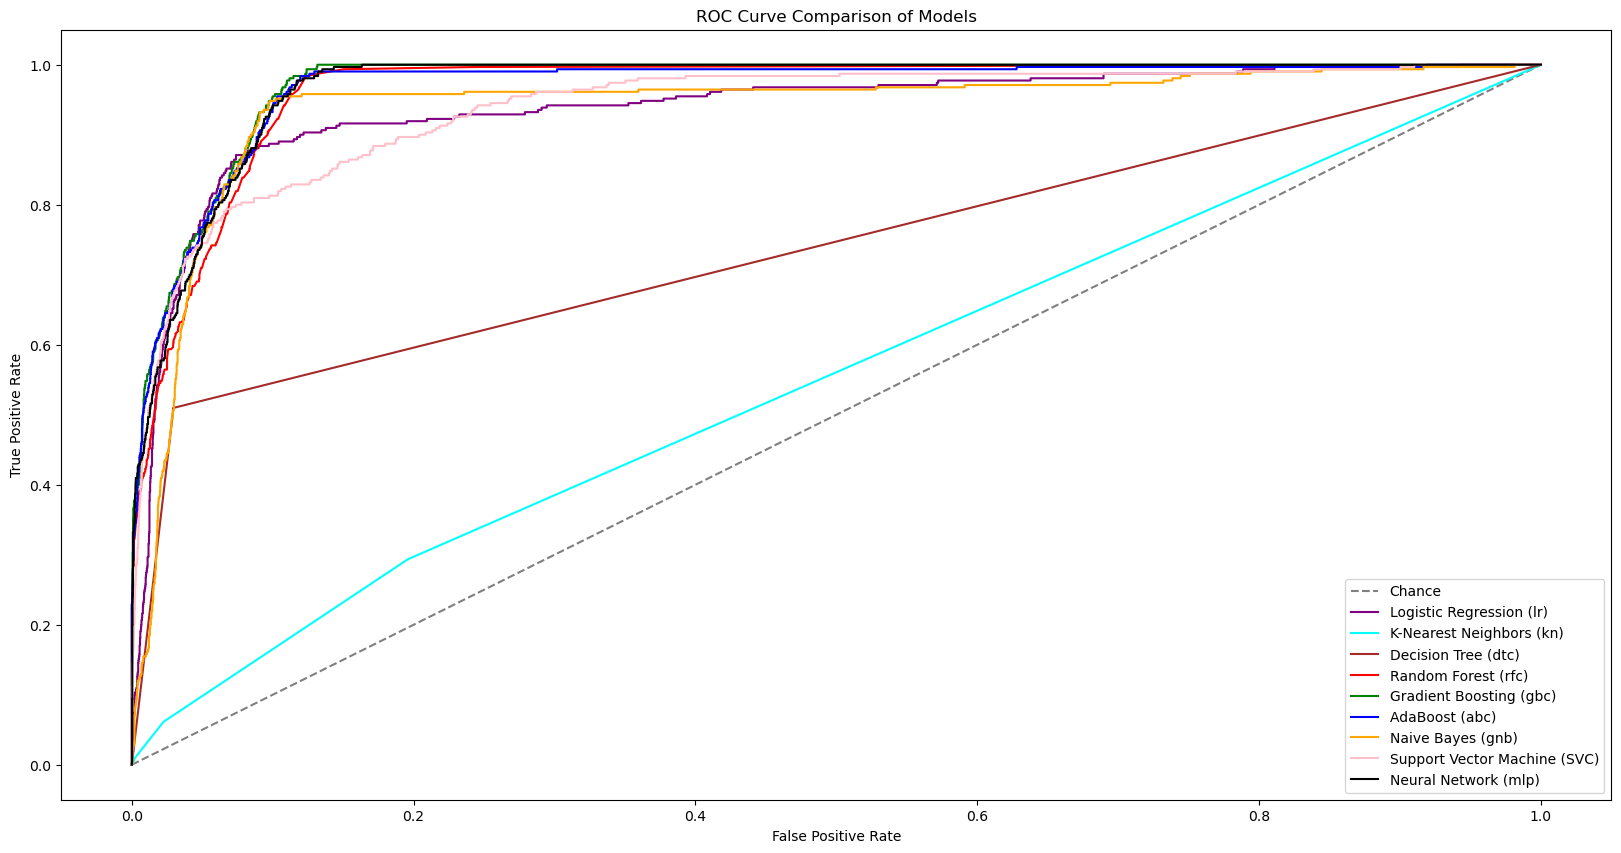

In [32]:
# Now that I have all of the evaluation metrics I want, I am going to plot them to better visualize the best metric:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize variables for storing False Positive Rate (FPR) and True Positive Rate (TPR)
log_fp, log_tp, _ = roc_curve(y_test, models["Logistic Regression"].predict_proba(X_test)[:, 1], pos_label=1)
knn_fp, knn_tp, _ = roc_curve(y_test, models["K-Nearest Neighbors"].predict_proba(X_test)[:, 1], pos_label=1)
dt_fp, dt_tp, _ = roc_curve(y_test, models["Decision Tree"].predict_proba(X_test)[:, 1], pos_label=1)
rf_fp, rf_tp, _ = roc_curve(y_test, models["Random Forest"].predict_proba(X_test)[:, 1], pos_label=1)
gbc_fp, gbc_tp, _ = roc_curve(y_test, models["Gradient Boosting"].predict_proba(X_test)[:, 1], pos_label=1)
abc_fp, abc_tp, _ = roc_curve(y_test, models["AdaBoost"].predict_proba(X_test)[:, 1], pos_label=1)
nb_fp, nb_tp, _ = roc_curve(y_test, models["Naive Bayes"].predict_proba(X_test)[:, 1], pos_label=1)
svm_fp, svm_tp, _ = roc_curve(y_test, models["Support Vector Machine"].decision_function(X_test), pos_label=1)
mlp_fp, mlp_tp, _ = roc_curve(y_test, models["Neural Network"].predict_proba(X_test)[:, 1], pos_label=1)

# Plotting the ROC curve
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance")
plt.plot(log_fp, log_tp, color="purple", label="Logistic Regression (lr)")
plt.plot(knn_fp, knn_tp, color="cyan", label="K-Nearest Neighbors (kn)")
plt.plot(dt_fp, dt_tp, color="brown", label="Decision Tree (dtc)")
plt.plot(rf_fp, rf_tp, color="red", label="Random Forest (rfc)")
plt.plot(gbc_fp, gbc_tp, color="green", label="Gradient Boosting (gbc)")
plt.plot(abc_fp, abc_tp, color="blue", label="AdaBoost (abc)")
plt.plot(nb_fp, nb_tp, color="orange", label="Naive Bayes (gnb)")
plt.plot(svm_fp, svm_tp, color="pink", label="Support Vector Machine (SVC)")
plt.plot(mlp_fp, mlp_tp, color="black", label="Neural Network (mlp)")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend()
plt.show()



__Gradient Boosting threshold changes__

In [33]:
# In this case, we are going to prioritize recall as we want to see how many no-shows we correctly predict out of all no-shows.
# We want to maximize no-show detection. It's a close call, but I am going with Gradient Boosting as the best model.

best_model = models["Gradient Boosting"]

# Get predicted probabilities for No-Show class (1)
y_prob = best_model.predict_proba(X_test)[:, best_model.classes_.tolist().index(1)]

# Try different thresholds
#thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]
#results = []

#for threshold in thresholds:
    #y_pred_custom = np.where(y_prob >= threshold, 1, 0)  
    #precision = precision_score(y_test, y_pred_custom, pos_label=1)
    #recall = recall_score(y_test, y_pred_custom, pos_label=1)
    #f1 = f1_score(y_test, y_pred_custom, pos_label=1)
    #results.append([threshold, precision, recall, f1])

# Convert results into a DataFrame
#threshold_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1-Score'])

# Display the threshold analysis
#print(threshold_df)


#Okay...not going to reference this for now. I am going to stick to the default setting of 50%



In [34]:
#Figuring out which features are most important

if hasattr(best_model, "feature_importances_"):
    feature_importance_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_model.feature_importances_
    })
    
    feature_importance_df.sort_values("Importance", ascending=False, inplace=True)
    feature_importance_df = feature_importance_df.head(20)

    print(feature_importance_df)

else:
    print("Feature importance not for model.")


                                     Feature  Importance
10                    TOTAL_NUMBER_OF_NOSHOW    0.542711
5                                   APPT_NUM    0.306685
4                      APPT_TYPE_STANDARDIZE    0.043892
2                                  LEAD_TIME    0.034996
9        TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT    0.021387
3                                  IS_REPEAT    0.013687
13                              NUM_OF_MONTH    0.011311
14                               HOUR_OF_DAY    0.008265
7                TOTAL_NUMBER_OF_RESCHEDULED    0.006558
12                             WEEK_OF_MONTH    0.003458
0                                    ZIPCODE    0.002914
15                                       AGE    0.001465
11                               DAY_OF_WEEK    0.001369
6              TOTAL_NUMBER_OF_CANCELLATIONS    0.000871
16                     ETHNICITY_STANDARDIZE    0.000430
1                                     CLINIC    0.000000
8   TOTAL_NUMBER_OF_NOT_CHECKOU

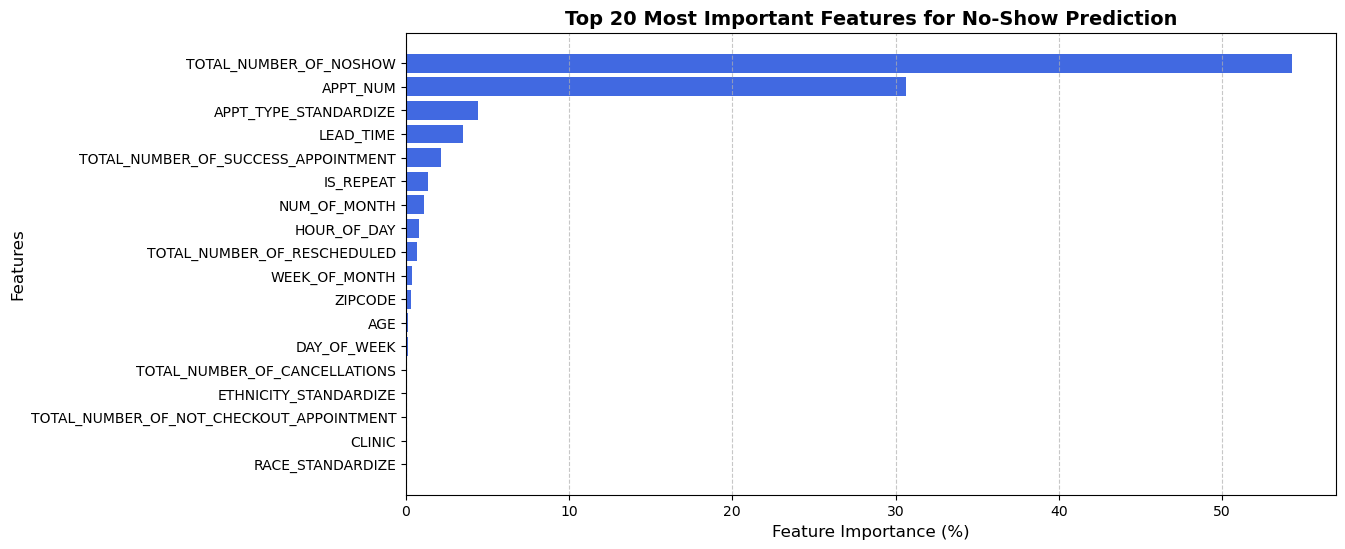

In [35]:
#Plotting the feature importance

feature_importance_df = feature_importance_df.sort_values("Importance", ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"] * 100, color="royalblue")
plt.xlabel("Feature Importance (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 20 Most Important Features for No-Show Prediction", fontsize=14, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [190]:
# Retrain the model on the full dataset
#X_full = pd.concat([X_train, X_test])
#y_full = pd.concat([y_train, y_test])

#best_model.fit(X_full, y_full)

GradientBoostingClassifier()

In [191]:
#print("Full dataset shape:", X_full.shape, y_full.shape)

Full dataset shape: (21058, 18) (21058,)


In [37]:
# Select best model
best_model = models["Gradient Boosting"]

# Retrain the model on the full dataset
#est_model.fit(X_full, y_full)

# Save the model and threshold
with open("best_no_show_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model retrained on full dataset and saved successfully!")

Model retrained on full dataset and saved successfully!


In [38]:
print(df_train["IS_NOSHOW"].value_counts(normalize=True))

IS_NOSHOW
0    0.950945
1    0.049055
Name: proportion, dtype: float64


Applying our newly saved model to more recent 2024 data

In [252]:
#We need to go through the same preprocessing steps on this 2024 data as the 2023 data.

col_names_2024 = df_2024.columns
print(col_names_2024)

Index(['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC',
       'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT',
       'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY',
       'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [253]:
#I am starting off by making sure they're in the right format
df_2024['BOOK_DATE'] = pd.to_datetime(df_2024['BOOK_DATE'])
df_2024['APPT_DATE'] = pd.to_datetime(df_2024['APPT_DATE'])

df_2024.head() #Make sure it's correct

#Moving on let's make a relevant "lead time feature"-- I am going to make it in the # days between booking and appointment
df_2024['LEAD_TIME'] = np.ceil((df_2024['APPT_DATE'] - df_2024['BOOK_DATE']).dt.total_seconds() / (24 * 60 * 60)).astype(int)

#Look again
df_2024.head()

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1873606,CONFIRMED,2024-05-08 15:30:00,2023-05-10 11:11:00,91731,ARCADIA CARE CENTER,22449467,76719526,365,Y,...,6,1,2,2,5,15,N,12,Others,Other
1,4133045,CONFIRMED,2024-05-07 09:00:00,2023-05-09 09:35:00,91030,ARCADIA CARE CENTER,22442496,76692312,364,Y,...,2,0,1,1,5,9,N,12,Others,Other
2,4462967,CONFIRMED,2024-04-16 11:00:00,2023-04-18 11:28:00,91301,ARCADIA CARE CENTER,22345715,76294805,364,Y,...,5,0,1,3,4,11,N,2,Non-Hispanic,European
3,1826941,CONFIRMED,2024-04-08 11:00:00,2023-04-10 12:13:00,93535,VALENCIA CARE CENTER,22306357,76166345,364,Y,...,3,0,0,2,4,11,N,13,Hispanic,SouthAmerican
4,4457024,CONFIRMED,2024-04-02 12:00:00,2023-04-04 12:39:00,91030,ARCADIA CARE CENTER,22282572,76086585,364,Y,...,4,0,1,1,4,12,N,7,Non-Hispanic,European


In [209]:
#checking to make sure its correct
df_2024[df_2024['LEAD_TIME']<300]

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
5,1915655,CONFIRMED,2024-03-12 11:30:00,2023-06-06 12:11:00,91307,VALENCIA CARE CENTER,22577532,77138265,280,Y,...,6,0,1,2,3,11,N,11,Non-Hispanic,European
19,1960542,CONFIRMED,2024-01-09 10:00:00,2023-05-30 11:32:00,90024,VALENCIA CARE CENTER,22543189,77021231,224,Y,...,8,0,1,2,1,10,N,21,Non-Hispanic,European
22,4478863,CONFIRMED,2024-01-04 11:00:00,2023-04-12 11:49:00,91354,VALENCIA CARE CENTER,22317397,76208302,267,Y,...,5,0,3,1,1,11,N,12,Non-Hispanic,Asian


In [210]:
#Dropping the same columns

#already defined columns above
#columns_to_drop = ['MRN', 'APPT_ID', 'SCHEDULE_ID', 'BOOK_DATE', 'APPT_DATE', 'APPT_STATUS']

#df_2024.drop(columns=columns_to_drop, inplace=True)

In [254]:
print(df_2024.columns)

Index(['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC',
       'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT',
       'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY',
       'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [215]:
#Don't want to drop this 
#X_2024_test = df_2024.drop(columns=["IS_NOSHOW"], errors="ignore") 

In [ ]:
# Load the saved encoders
#with open("NEW_no_show_encoder.pkl", "rb") as encoder_file:
 #   encoder_dict = pickle.load(encoder_file)

# Apply encoding to 2024 test data
#for col in category_col:
 #   if col in df_2024.columns:
  #      df_2024[col] = df_2024[col].apply(
   #         lambda x: encoder_dict[col].transform([x])[0] if x in encoder_dict[col].classes_ 
    #        else encoder_dict[col].transform(['Unknown'])[0]
        )


#print("Successfully encoded 2024 data!")

Successfully encoded 2024 data!


In [255]:
#Using an example column to make sure the encoder .pkl file saved them correctly and not as lists
print(type(encoder_dict['ZIPCODE'])) 

<class 'sklearn.preprocessing._label.LabelEncoder'>


In [256]:
df_2024.head()

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1873606,CONFIRMED,2024-05-08 15:30:00,2023-05-10 11:11:00,91731,ARCADIA CARE CENTER,22449467,76719526,365,Y,...,6,1,2,2,5,15,N,12,Others,Other
1,4133045,CONFIRMED,2024-05-07 09:00:00,2023-05-09 09:35:00,91030,ARCADIA CARE CENTER,22442496,76692312,364,Y,...,2,0,1,1,5,9,N,12,Others,Other
2,4462967,CONFIRMED,2024-04-16 11:00:00,2023-04-18 11:28:00,91301,ARCADIA CARE CENTER,22345715,76294805,364,Y,...,5,0,1,3,4,11,N,2,Non-Hispanic,European
3,1826941,CONFIRMED,2024-04-08 11:00:00,2023-04-10 12:13:00,93535,VALENCIA CARE CENTER,22306357,76166345,364,Y,...,3,0,0,2,4,11,N,13,Hispanic,SouthAmerican
4,4457024,CONFIRMED,2024-04-02 12:00:00,2023-04-04 12:39:00,91030,ARCADIA CARE CENTER,22282572,76086585,364,Y,...,4,0,1,1,4,12,N,7,Non-Hispanic,European


In [257]:
print(df_2024.columns)

Index(['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC',
       'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT',
       'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY',
       'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [258]:
print(df_train.columns)

Index(['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC',
       'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT',
       'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY',
       'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [259]:
new_file_path = "C:/Users/ashle/Downloads/streamlit_handson/ml-app/NEW_CLEAN_CHLA_clean_data_2024_Appointments.csv"
df_2024.to_csv(new_file_path, index=False)

In [98]:
#Not using this
#pickle_in = open("best_no_show_model.pkl", "rb")
#best_model, best_threshold = pickle.load(pickle_in)
#pickle_in.close()

In [101]:
#I want to double check that the proper model and threshold were saved as the .pkl file
#print(f"Loaded Model: {best_model}")
#print(f"Loaded Threshold: {best_threshold}")

Loaded Model: GradientBoostingClassifier()
Loaded Threshold: 0.35


In [ ]:
#y_prob_2024 = best_model.predict_proba(X_2024_test)[:, best_model.classes_.tolist().index(2)]

In [102]:
#y_pred_2024 = np.where(y_prob_2024 >= best_threshold, 2, 0)  # 2 = No-Show, 0 = Show-Up

# Add predictions to DataFrame
#df_test["Predicted_No_Show"] = y_pred_2024

In [103]:
#df_test.head()

,ZIPCODE,CLINIC,LEAD_TIME,IS_REPEAT,APPT_TYPE_STANDARDIZE,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE,Predicted_No_Show
0,91731,ARCADIA CARE CENTER,365,Y,Follow-up,11,1,2,0,6,1,2,2,5,15,N,12,Others,Other,0
1,91030,ARCADIA CARE CENTER,364,Y,Follow-up,4,0,1,0,2,0,1,1,5,9,N,12,Others,Other,0
2,91301,ARCADIA CARE CENTER,364,Y,Follow-up,10,3,1,0,5,0,1,3,4,11,N,2,Non-Hispanic,European,0
3,93535,VALENCIA CARE CENTER,364,Y,Follow-up,5,1,0,0,3,0,0,2,4,11,N,13,Hispanic,SouthAmerican,0
4,91030,ARCADIA CARE CENTER,364,Y,Follow-up,6,1,0,0,4,0,1,1,4,12,N,7,Non-Hispanic,European,0


In [107]:
#comparison_df = df_test[['IS_NOSHOW', 'Predicted_No_Show']].copy()

# Rename columns
#comparison_df.columns = ['Actual No-Show', 'Predicted No-Show']

# Count occurrences for each category
#comparison_counts = comparison_df.value_counts().reset_index()
#comparison_counts.columns = ['Actual No-Show', 'Predicted No-Show', 'Count']

#print(comparison_df)

#I didn't check until after I ran this, but our original 2024 only had patients that were NOT no shows.. so it seems they were accuratley predicted.

   Actual No-Show  Predicted No-Show
0               N                  0
1               N                  0
2               N                  0
3               N                  0
4               N                  0
5               N                  0
6               N                  0
7               N                  0
8               N                  0
9               N                  0
10              N                  0
11              N                  0
12              N                  0
13              N                  0
14              N                  0
15              N                  0
16              N                  0
17              N                  0
18              N                  0
19              N                  0
20              N                  0
21              N                  0
22              N                  0
23              N                  0


__ADDITIONAL TESTING__

In [158]:
import pickle

# Load the trained model and threshold
with open("best_no_show_model.pkl", "rb") as file:
    best_model, best_threshold = pickle.load(file)

# Load trained encoders
with open("NEW_no_show_encoder.pkl", "rb") as encoder_file:
    encoder_dict = pickle.load(encoder_file)

# Define categorical feature names
category_col = ['ZIPCODE', 'CLINIC', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']

# Define feature order (must match model training)
expected_features = best_model.feature_names_in_

# Create a single test case (hypothetical patient)
patient = pd.DataFrame([[
    90001, "General Clinic", 0, "Follow-Up", "Hispanic", "White", 1, 2, 6, 15  # Features only
]], columns=['ZIPCODE', 'CLINIC', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 
             'RACE_STANDARDIZE', 'LEAD_TIME', 'DAY_OF_WEEK', 'NUM_OF_MONTH', 'HOUR_OF_DAY'])

# Encode categorical variables
for col in category_col:
    if col in patient.columns:
        patient[col] = patient[col].apply(lambda x: 
            encoder_dict[col].transform([x])[0] if x in encoder_dict[col].classes_ 
            else encoder_dict[col].transform(['Unknown'])[0])

# Add missing columns if necessary and fill with default values (0)
missing_cols = set(expected_features) - set(patient.columns)
for col in missing_cols:
    patient[col] = 0  

# Ensure correct column order to match model training
patient = patient[expected_features]

# **Make Prediction**
y_prob = best_model.predict_proba(patient)[:, best_model.classes_.tolist().index(1)]

# Apply threshold
predicted_no_show = np.where(y_prob >= best_threshold, "No-Show", "Show-Up")[0]

# Display results
print("Predicted No-Show Status:", predicted_no_show)
print("Probability of No-Show:", round(y_prob[0], 3))


Predicted No-Show Status: Show-Up
Probability of No-Show: 0.0


In [159]:
print("Expected Features:", expected_features)
print("Patient Features:", patient.columns)

Expected Features: ['ZIPCODE' 'CLINIC' 'LEAD_TIME' 'IS_REPEAT' 'APPT_TYPE_STANDARDIZE'
 'APPT_NUM' 'TOTAL_NUMBER_OF_CANCELLATIONS' 'TOTAL_NUMBER_OF_RESCHEDULED'
 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT'
 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT' 'TOTAL_NUMBER_OF_NOSHOW'
 'DAY_OF_WEEK' 'WEEK_OF_MONTH' 'NUM_OF_MONTH' 'HOUR_OF_DAY' 'AGE'
 'ETHNICITY_STANDARDIZE' 'RACE_STANDARDIZE']
Patient Features: Index(['ZIPCODE', 'CLINIC', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE',
       'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS',
       'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'AGE',
       'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE'],
      dtype='object')


In [160]:
print("Expected Features:", list(expected_features))  # Model's expected features
print("Patient Features:", list(patient.columns))  # Features in the test case

print("Expected Shape:", len(expected_features))  
print("Patient Shape:", patient.shape[1])  


Expected Features: ['ZIPCODE', 'CLINIC', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']
Patient Features: ['ZIPCODE', 'CLINIC', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']
Expected Shape: 18
Patient Shape: 18
